In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from GLA.GDA import GaussianDiscriminantAnalysis

In [5]:
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

gda = GaussianDiscriminantAnalysis()
gda.fit(X_train, y_train)

# Make predictions on the test set
custom_y_pred = gda.predict(X_test)

# Evaluate the accuracy of the model
custom_pred_accuracy = accuracy_score(y_test, custom_y_pred)
print("Custom predicted score accuracy: ", custom_pred_accuracy)

sklearn_lr = SklearnLogisticRegression(max_iter=1000)
sklearn_lr.fit(X_train, y_train)
y_pred_sklearn = sklearn_lr.predict(X_test)
sk_pred_accuracy = accuracy_score(y_test, y_pred_sklearn)
print("Sklearn predicted score accuracy: ", sk_pred_accuracy)

Custom predicted score accuracy:  0.9666666666666667
Sklearn predicted score accuracy:  0.9333333333333333


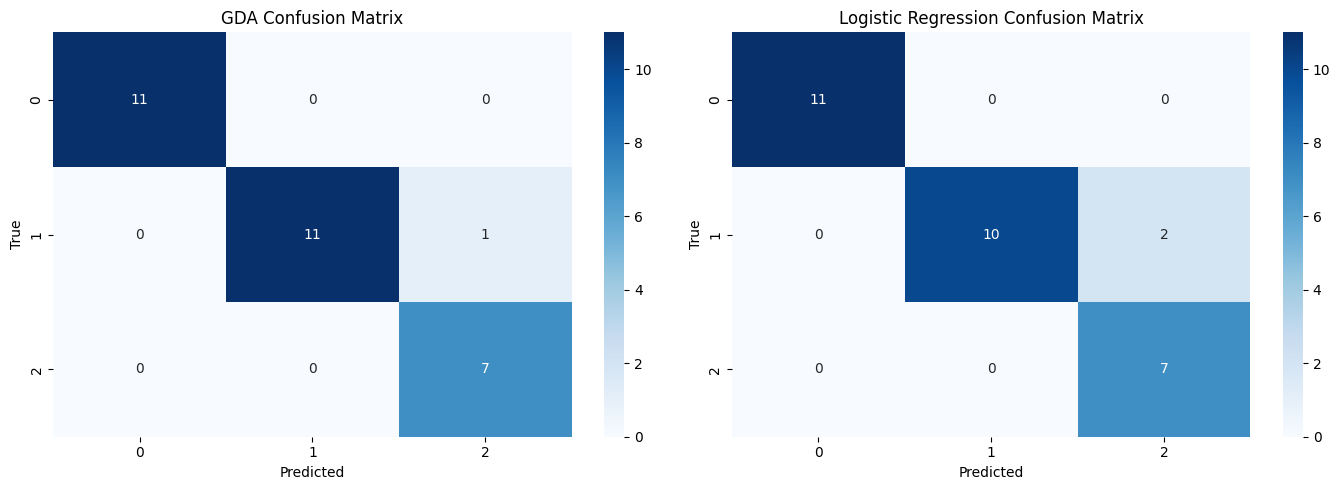

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm_gda = confusion_matrix(y_test, custom_y_pred)
sns.heatmap(cm_gda, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('GDA Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

cm_lr = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()